<a href="https://colab.research.google.com/github/Mwikali-5/Predictive/blob/main/Credit_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assessment Question**

Gnu Grid is a credit company that gives applicants loans. They want to be able to correctly classify the applicants based on their credit rating on whether they will default or not. A default is defined as a failure to repay a loan instalment for more than 90 days.

This analysis will delve deeper into the features that are most likely to indicate whether an applicant will default or not.

# **Implementation**

##  **1. Defining the Question**



### a) Specifying the Question

Build a classifier model to predict whether a customer will default or not.

### b) Defining the Metric for Success
1. To predict whether a customer will default(failure to repay a loan) or not(successfully pay their loan) with an accuracy of atleast 75% and a recall score of above 80%

### c) Understanding the Context

Giving out loans is a risky business since there are people who are most likely going to default thus it is good practice to accurately rate the applicants well so as to avoid many defaulters.

It is detrimental to analyse the features provided to see if a pattern can be identified that will make it easier to rate the good applicants well and avoid as many defaulers as possible to help the company give out loans to people who have a good credit score.

### d) Recording the Experimental Design
1. Importing the libraries
2. Reading the data
3. Data Wrangling
4. Exploratory data analysis
5. Data Preprocessing
6. Supervised Learning
7. Conclusions
8. Recommendations
9. Follow up questions

### e) Data Description
1. OBS#:	Observation No.
2. CHK_ACCT:	Checking account status
3. DURATION:	Duration of credit in months
4. HISTORY:	Credit history
5. NEW_CAR:	Purpose of credit
6. USED_CAR:	Purpose of credit
7. FURNITURE:	Purpose of credit
8. RADIO/TV:	Purpose of credit
9. EDUCATION:	Purpose of credit
10. RETRAINING:	Purpose of credit
11. AMOUNT:	Credit amount
12. SAV_ACCT:	Average balance in savings account
13. EMPLOYMENT:	Present employment since
14. INSTALL_RATE:	Installment rate as % of disposable income
15. MALE_DIV:	Applicant is male and divorced
16. MALE_SINGLE:	Applicant is male and single
17. MALE_MAR_WID:	Applicant is male and married or a widower
18. CO-APPLICANT:	Application has a co-applicant
19. GUARANTOR:	Applicant has a guarantor
20. PRESENT_RESIDENT:	Present resident since - years
21. REAL_ESTATE:	Applicant owns real estate
22. PROP_UNKN_NONE:	Applicant owns no property (or unknown)
23. AGE:	Age in years
24. OTHER_INSTALL:	Applicant has other installment plan credit
25. RENT:	Applicant rents
26. OWN_RES:	Applicant owns residence
27. NUM_CREDITS:	Number of existing credits at this bank
28. JOB:	Nature of job
29. NUM_DEPENDENTS:	Number of people for whom liable to provide maintenance
30. TELEPHONE:	Applicant has phone in his or her name
31. FOREIGN:	Foreign worker
32. RESPONSE:	Credit rating is good



## **2. Data Exploration**

### **a. Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(8,6)})

#sklearn library
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection as model_selection
from sklearn import metrics as metrics
from sklearn import ensemble as ensemble

### **b. Reading the Data**

In [ ]:
df = pd.read_excel("/FAITH M.CSV.xlsx")

### **c. Data Exploration**

In [ ]:
#Preview of the dataset
df.head()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,0


In [ ]:
#Preview of the tail of the dataset
df.tail()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
995,996,3,12,2,0,0,1,0,0,0,...,31,0,0,1,1,1,1,0,0,1
996,997,0,30,2,0,1,0,0,0,0,...,40,0,0,1,1,3,1,1,0,1
997,998,3,12,2,0,0,0,1,0,0,...,38,0,0,1,1,2,1,0,0,1
998,999,0,45,2,0,0,0,1,0,0,...,23,0,0,0,1,2,1,1,0,0
999,1000,1,45,4,0,1,0,0,0,0,...,27,0,0,1,1,2,1,0,0,1


In [ ]:
#Checking the number of rows and columns
df.shape

(1000, 32)

In [ ]:
#Checking columns and their datatypes
df.info()

#none of the columns have any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OBS#              1000 non-null   int64
 1   CHK_ACCT          1000 non-null   int64
 2   DURATION          1000 non-null   int64
 3   HISTORY           1000 non-null   int64
 4   NEW_CAR           1000 non-null   int64
 5   USED_CAR          1000 non-null   int64
 6   FURNITURE         1000 non-null   int64
 7   RADIO/TV          1000 non-null   int64
 8   EDUCATION         1000 non-null   int64
 9   RETRAINING        1000 non-null   int64
 10  AMOUNT            1000 non-null   int64
 11  SAV_ACCT          1000 non-null   int64
 12  EMPLOYMENT        1000 non-null   int64
 13  INSTALL_RATE      1000 non-null   int64
 14  MALE_DIV          1000 non-null   int64
 15  MALE_SINGLE       1000 non-null   int64
 16  MALE_MAR_or_WID   1000 non-null   int64
 17  CO-APPLICANT      1000 non-null   

## **3. Data Cleaning**

In [ ]:
#Checking duplicates
df.duplicated().sum()

0

In [ ]:
#Dropping unnecessary columns
#will drop the OBS column since it represents the number of entries of the applicants and will not assist us in the analysis
df.drop(['OBS#'], axis=1, inplace=True)

In [ ]:
#Creating new columns to validate if indeed the data is binary or categorical
catColumns = ['CHK_ACCT', 'HISTORY', 'SAV_ACCT', 'EMPLOYMENT', 'PRESENT_RESIDENT', 'JOB' ]
numColumns = ['DURATION', 'AMOUNT', 'INSTALL_RATE', 'AGE', 'NUM_CREDITS', 'NUM_DEPENDENTS']
biColumns = ['NEW_CAR', 'USED_CAR','FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'MALE_DIV', 'MALE_SINGLE','MALE_MAR_or_WID', 'CO-APPLICANT',
            'GUARANTOR', 'REAL_ESTATE', 'PROP_UNKN_NONE', 'OTHER_INSTALL', 'RENT','OWN_RES', 'TELEPHONE','FOREIGN', 'RESPONSE']

In [ ]:
#Validating if binary columns are binary
singleColumns = []
validColumns = []
moreColumns = []
singleCheck = False
tripleCheck = False

for i in biColumns:
  #to print a line in between columns
  if df[i].unique().size == 1:
    print(f"Column {i} has single unique value")
    singleColumns.append(i)
  elif df[i].unique().size > 2:
    print(f"Column {i} has more than two unique values")
    validColumns.append(i)
  else:
    print("===============================")
    print(f"Column {i} is binary")
    if 0 in df[i].unique() & 1 in df[i].unique():
      print(f"Column {i} is binary and valid")
      moreColumns.append(i)

Column NEW_CAR is binary
Column NEW_CAR is binary and valid
Column USED_CAR is binary
Column USED_CAR is binary and valid
Column FURNITURE is binary
Column FURNITURE is binary and valid
Column RADIO/TV is binary
Column RADIO/TV is binary and valid
Column EDUCATION is binary
Column EDUCATION is binary and valid
Column RETRAINING is binary
Column RETRAINING is binary and valid
Column MALE_DIV is binary
Column MALE_DIV is binary and valid
Column MALE_SINGLE is binary
Column MALE_SINGLE is binary and valid
Column MALE_MAR_or_WID is binary
Column MALE_MAR_or_WID is binary and valid
Column CO-APPLICANT is binary
Column CO-APPLICANT is binary and valid
Column GUARANTOR is binary
Column GUARANTOR is binary and valid
Column REAL_ESTATE is binary
Column REAL_ESTATE is binary and valid
Column PROP_UNKN_NONE is binary
Column PROP_UNKN_NONE is binary and valid
Column OTHER_INSTALL is binary
Column OTHER_INSTALL is binary and valid
Column RENT is binary
Column RENT is binary and valid
Column OWN_RES

All binary columns are valid.

In [ ]:
#Validating that the number of categories are valid according to the data dictionary
print(np.sort(df['CHK_ACCT'].unique()))
print(np.sort(df['HISTORY'].unique()))
print(np.sort(df['SAV_ACCT'].unique()))
print(np.sort(df['EMPLOYMENT'].unique()))
print(np.sort(df['PRESENT_RESIDENT'].unique()))
print(np.sort(df['JOB'].unique()))


[0 1 2 3]
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
[1 2 3 4]
[0 1 2 3]


All columns are valid except for present_resident where the values of the categories are not the same as the ones provided in the data dictionary.

Please advise on how to move forward with the said column.

## **4. Exploratory Data Analysis**

### a) Univariate

In [ ]:
#Statistical summary of the numerical columns
df[numColumns].describe()

,DURATION,AMOUNT,INSTALL_RATE,AGE,NUM_CREDITS,NUM_DEPENDENTS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,75.000000,4.000000,2.000000


[Text(0.5, 1.0, 'Duration of Credit in Months')]

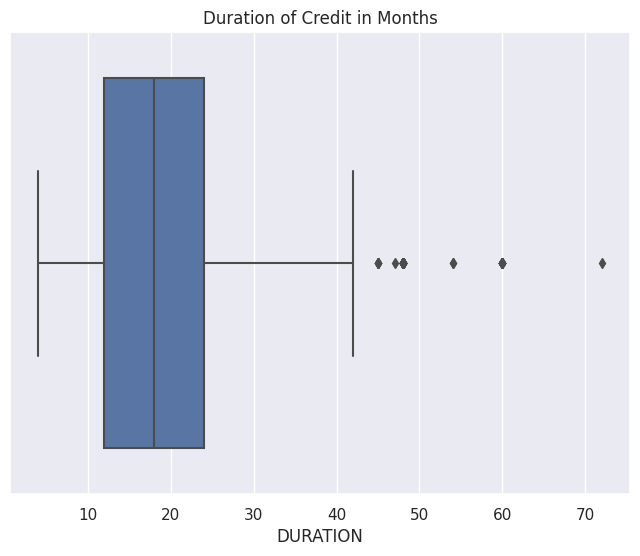

In [ ]:
sns.boxplot(data=df, x='DURATION').set(title='Duration of Credit in Months')

There are outliers though it is possible for someone to take that long to repay their credit thus the outiers will remain.
This is a valid numerical column.

[Text(0.5, 1.0, 'Credit Amount')]

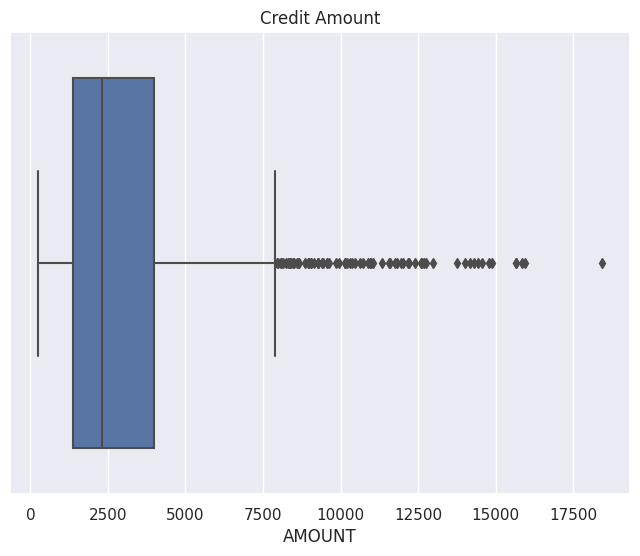

In [ ]:
sns.boxplot(data=df, x='AMOUNT').set(title='Credit Amount')

There are outliers though it is possible for someone to have that amount in credit.
This is a valid numerical column.

[Text(0.5, 1.0, 'Installment rate as % of Disposable Income')]

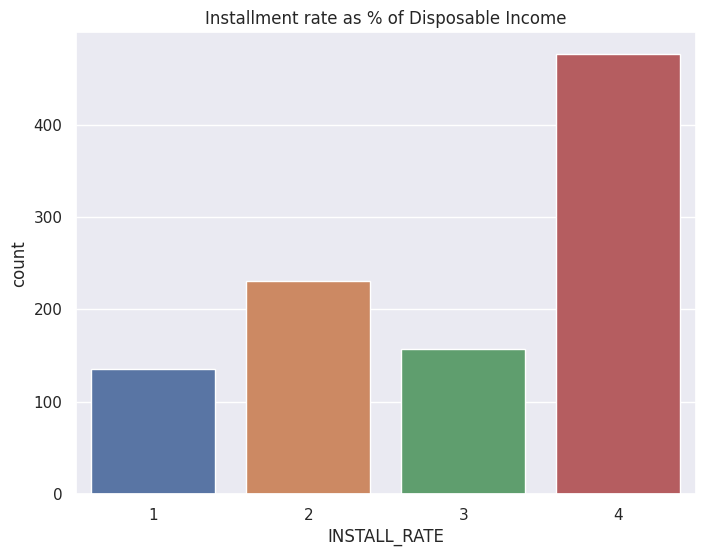

In [ ]:
sns.countplot(data=df, x='INSTALL_RATE').set(title='Installment rate as % of Disposable Income')

Most people have an installment rate of 4% of their disposable income
This is a categorical column.

[Text(0.5, 1.0, 'Age in Years')]

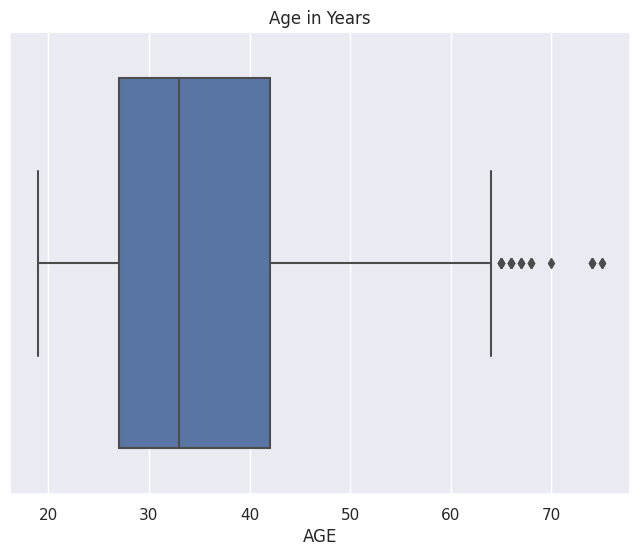

In [ ]:
sns.boxplot(data=df, x='AGE').set(title='Age in Years')

The outliers will not be dropped since it is possible to get credit even at the age of 75 years
This is a valid numerical column

[Text(0.5, 1.0, 'Number of Existing Credits at the Bank')]

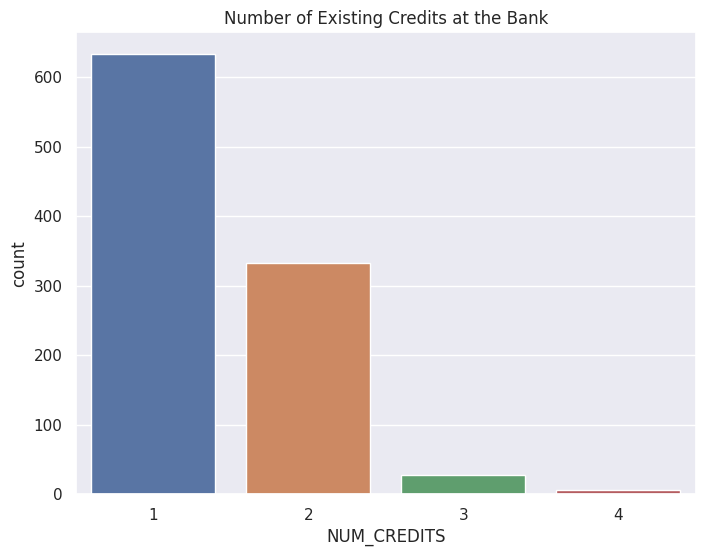

In [ ]:
sns.countplot(data=df, x='NUM_CREDITS').set(title='Number of Existing Credits at the Bank')

Most people have one existing credit at the given bank.
This is a categorical column.

[Text(0.5, 1.0, 'Number of people liable to provide maintenance')]

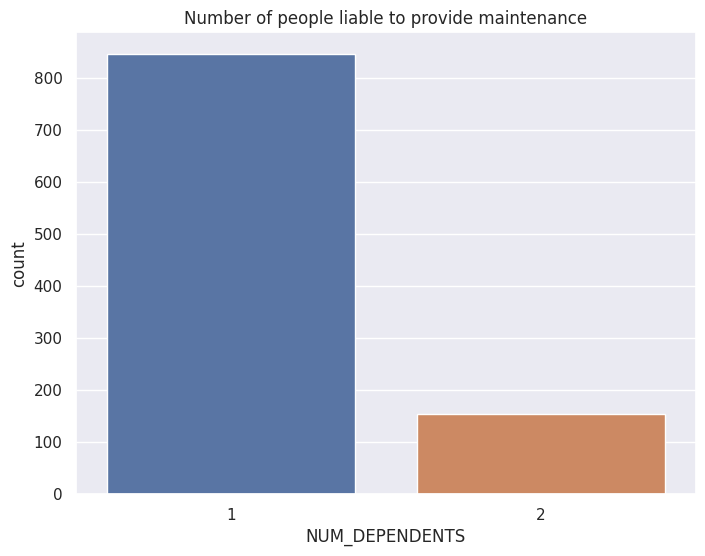

In [ ]:
sns.countplot(data=df, x='NUM_DEPENDENTS').set(title='Number of people liable to provide maintenance')

Most borrowes are responsible for their loans. Only 20% of loans have two people to repay the credit.
This is a categorical column.

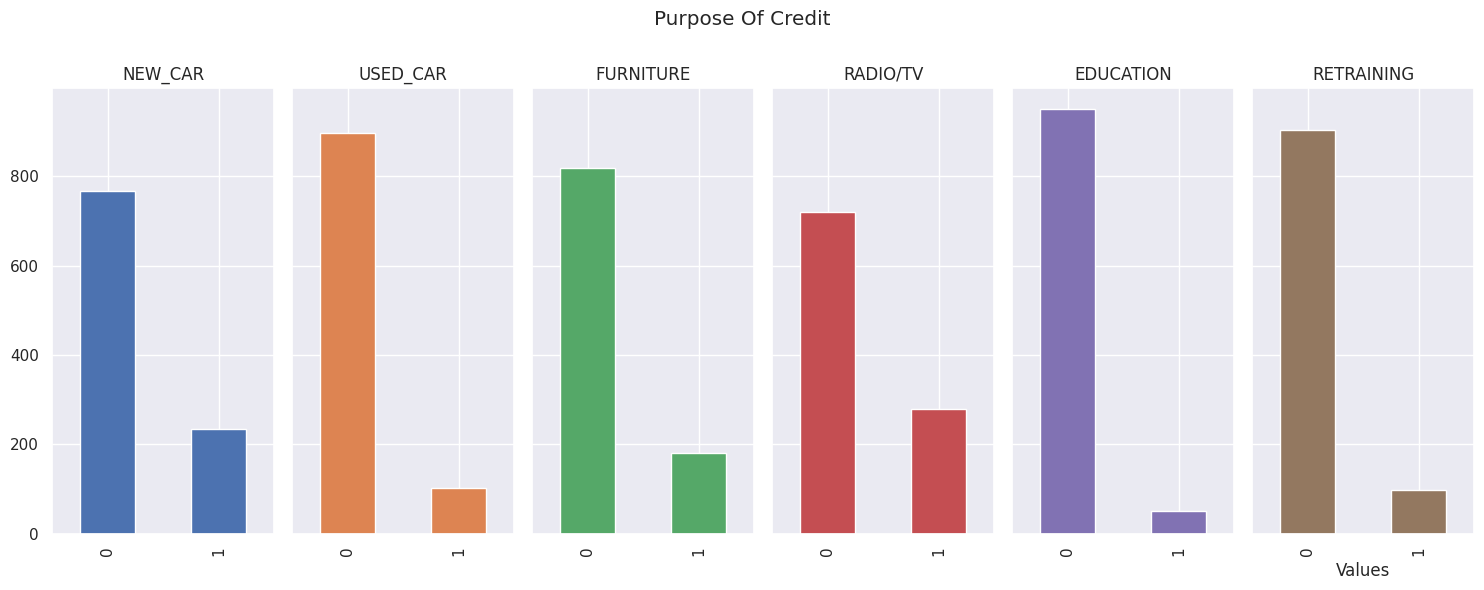

In [ ]:
#Selecting the purpose of credit binary colums
value_counts_df = df[biColumns[0:6]].apply(pd.Series.value_counts)

#plotting the subplots to show purpose of credit
ax = value_counts_df.plot(kind='bar', subplots=True, layout=(1, len(biColumns[0:6])), figsize=(15,6), legend=False, sharey=True)
plt.suptitle('Purpose Of Credit')
plt.xlabel('Values')
plt.ylabel('Counts')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

In [ ]:
df[biColumns[0:6]].apply(pd.Series.value_counts)

,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING
0,766,897,819,720,950,903
1,234,103,181,280,50,97


1. 234 of the applicants took a loan to buy a new car
2. 103 of the applicants took a loan to buy a used car
3. 181 of the applicants took a loan to buy furniture
4. 280 of the applicants took a loan to buy a radio/tv
5. 50 of the applicants took a loan for education purposes
6. 97 of the applicants took a loan for retraining purposes

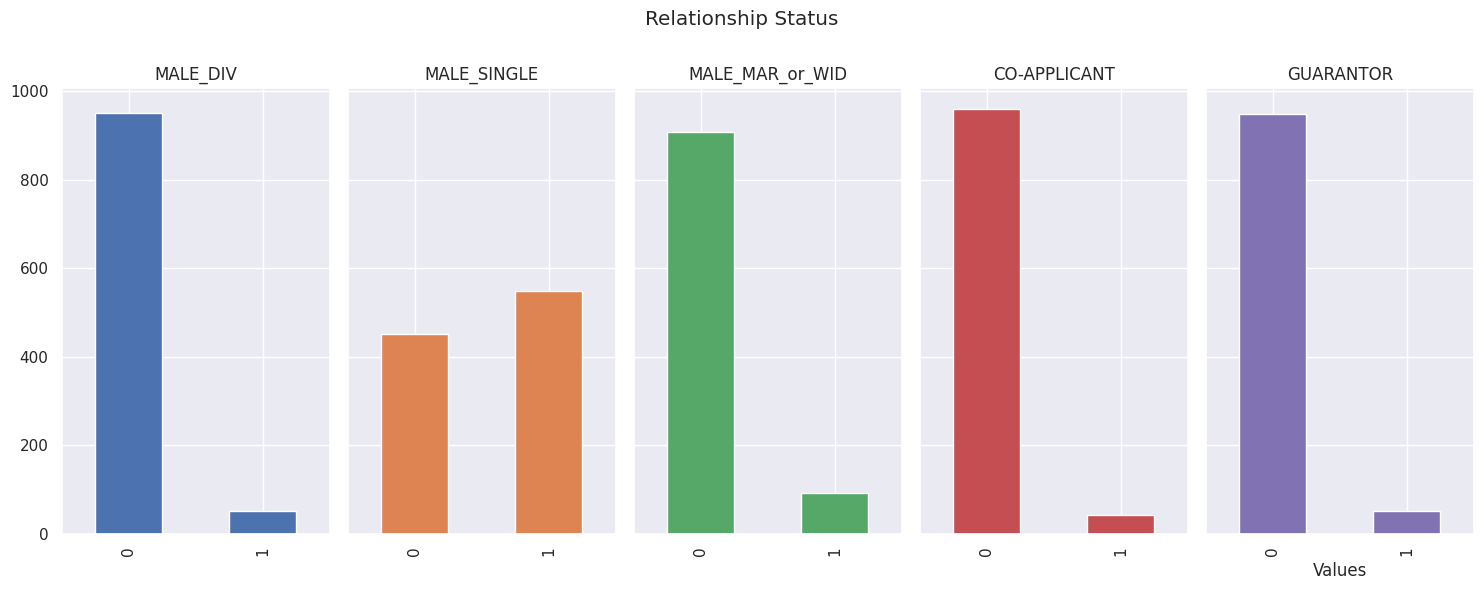

In [ ]:
#selecting binary columns that indicate relationship status of the creditor

value_counts_df = df[biColumns[6:11]].apply(pd.Series.value_counts)

#plotting the subplots to show relationship status
ax = value_counts_df.plot(kind='bar', subplots=True, layout=(1, len(biColumns[6:11])), figsize=(15,6), legend=False, sharey=True)
plt.suptitle('Relationship Status')
plt.xlabel('Values')
plt.ylabel('Counts')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

In [ ]:
df[biColumns[6:11]].apply(pd.Series.value_counts)

,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR
0,950,452,908,959,948
1,50,548,92,41,52


1. 50 of the applicants are male and divorced.
2. 548 of the applicants are male and single
3. 92 of the applicants are married or a widower
4. 41 of the applicants have a co-applicant
5. 52 of the applicants have a guarantor

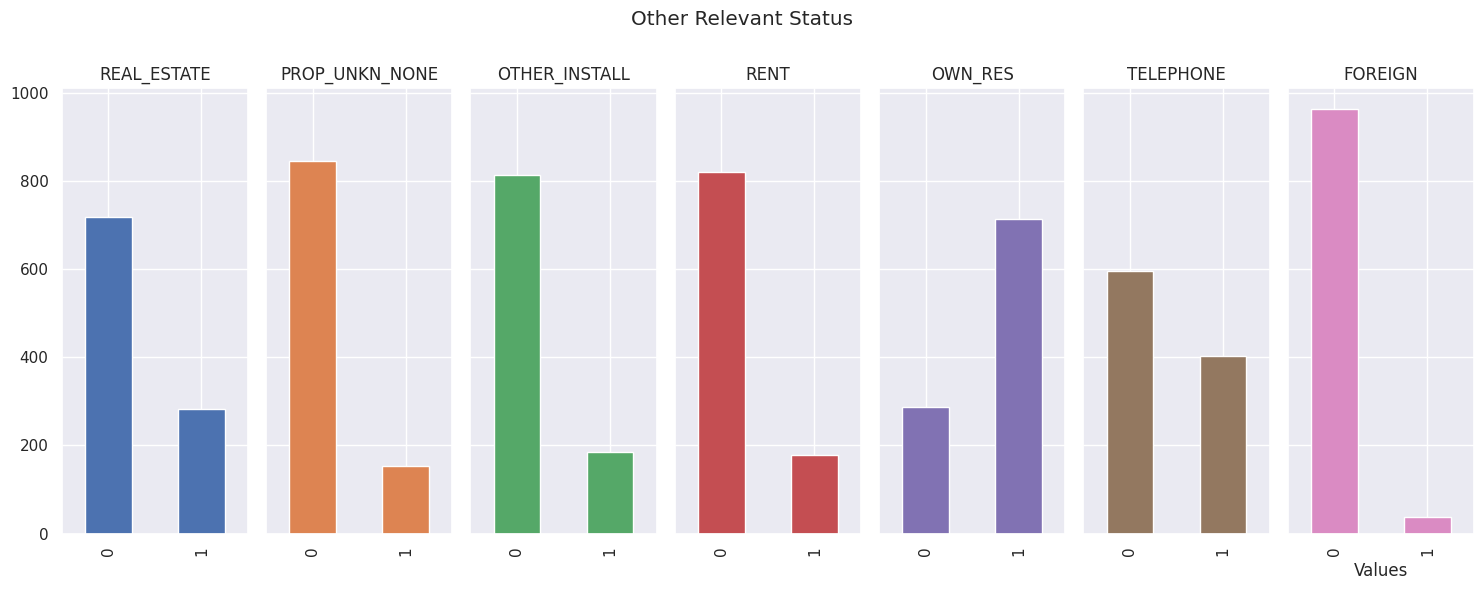

In [ ]:
#selecting binary columns that indicate other important status

value_counts_df = df[biColumns[11:-1]].apply(pd.Series.value_counts)

#plotting the subplots to show relationship status
ax = value_counts_df.plot(kind='bar', subplots=True, layout=(1, len(biColumns[11:-1])), figsize=(15,6), legend=False, sharey=True)
plt.suptitle('Other Relevant Status')
plt.xlabel('Values')
plt.ylabel('Counts')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

In [ ]:
df[biColumns[11:-1]].apply(pd.Series.value_counts)

,REAL_ESTATE,PROP_UNKN_NONE,OTHER_INSTALL,RENT,OWN_RES,TELEPHONE,FOREIGN
0,718,846,814,821,287,596,963
1,282,154,186,179,713,404,37


1. 282 of the applicants owns a real estate
2. 154 of the applicants owns no property or status is unknown
3. 186 of the applicants has another installment plan
4. 179 of the applicants rents
5. 713 of the applicants owns residence
6. 404 of the applicants has a phone in their name
7. 37 of the applicants are a foreign worker


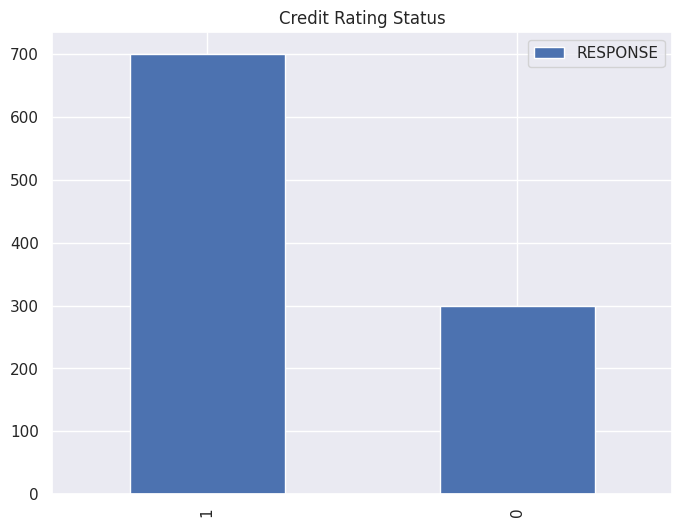

In [ ]:
df[biColumns[-1:]].apply(pd.Series.value_counts).plot(kind='bar')
plt.title('Credit Rating Status')
plt.show()

About 70% of the applicants have a good credit rating.

Also note there is a class imbalance.

### **b) Bivariate**

[Text(0.5, 1.0, 'Present Employment Since')]

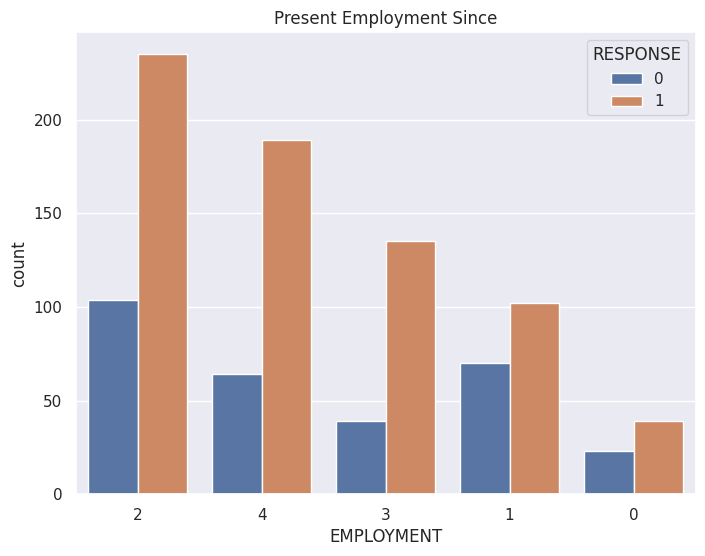

In [ ]:
sns.countplot(data=df, x='EMPLOYMENT', order=df.EMPLOYMENT.value_counts().index, hue='RESPONSE').set(title="Present Employment Since")

Most of the applicants who have good credit have been employeed for less than four years.

[Text(0.5, 1.0, 'Average Balance in Savings Account')]

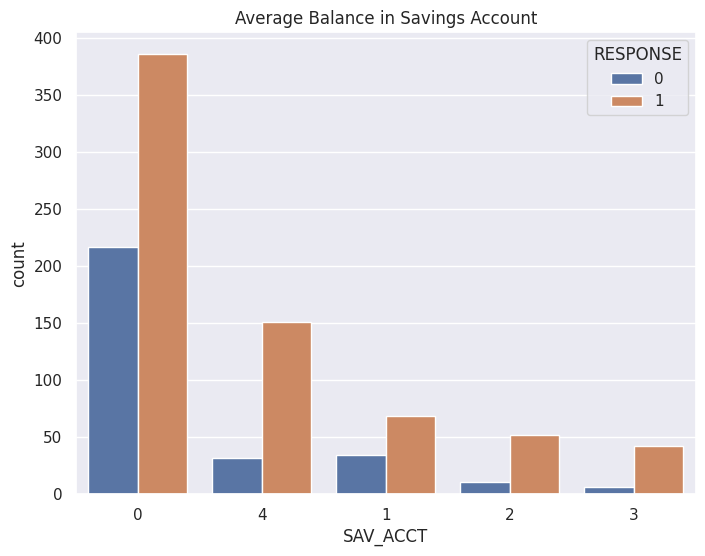

In [ ]:
sns.countplot(data=df, x='SAV_ACCT', order=df.SAV_ACCT.value_counts().index, hue='RESPONSE').set(title="Average Balance in Savings Account")

Most of the applicants who have good credit have less than 100DM in their savings account.

[Text(0.5, 1.0, 'Credit History')]

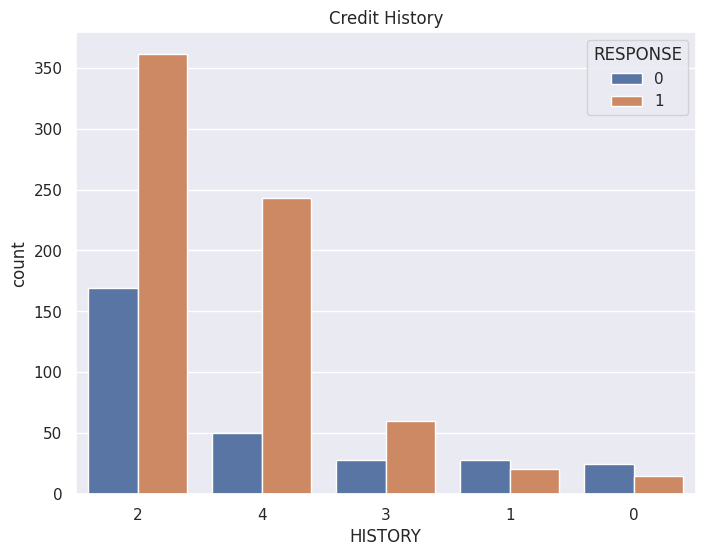

In [ ]:
sns.countplot(data=df, x='HISTORY', order=df.HISTORY.value_counts().index, hue='RESPONSE').set(title="Credit History")

Most of the applicants who have good credit rating have existing credits that have been paid back fully till now

[Text(0.5, 1.0, 'Account Status')]

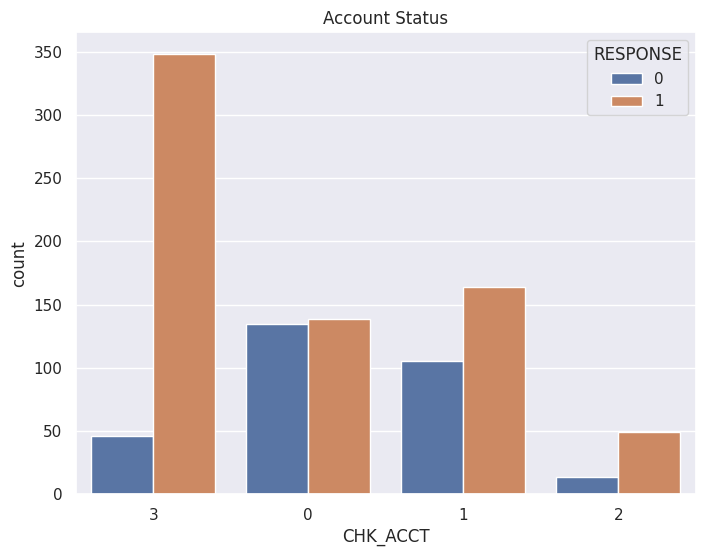

In [ ]:
sns.countplot(data=df, x='CHK_ACCT', order=df.CHK_ACCT.value_counts().index, hue='RESPONSE').set(title="Account Status")

Most of the applicants who have good credit rating have no checking account

[Text(0.5, 1.0, 'Nature of Job')]

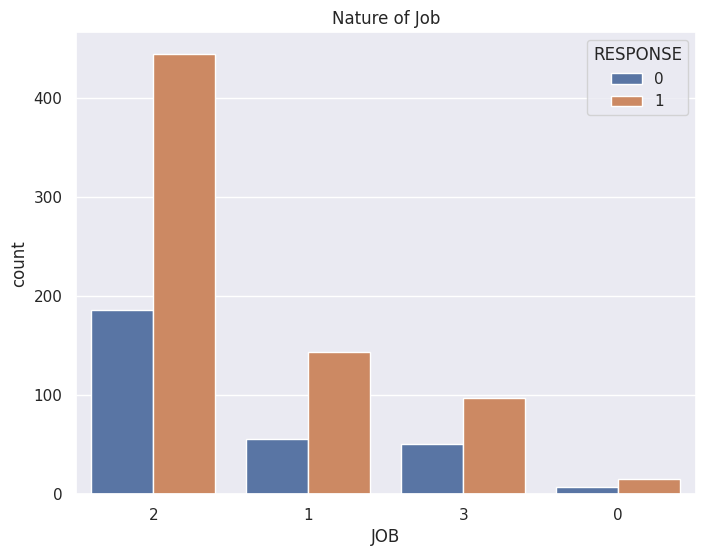

In [ ]:
sns.countplot(data=df, x='JOB', order=df.JOB.value_counts().index, hue='RESPONSE').set(title="Nature of Job")

Most of the applicants who have good credit rating are skilled employees/officials

[Text(0.5, 1.0, 'Present Resident')]

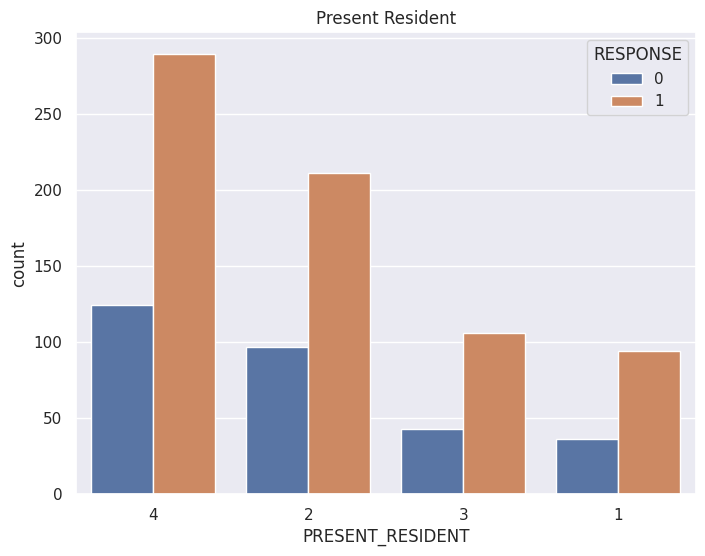

In [ ]:
sns.countplot(data=df, x='PRESENT_RESIDENT', order=df.PRESENT_RESIDENT.value_counts().index, hue='RESPONSE').set(title="Present Resident")

Most of the applicants who have good credit rating have been present residents for more than 4 years.

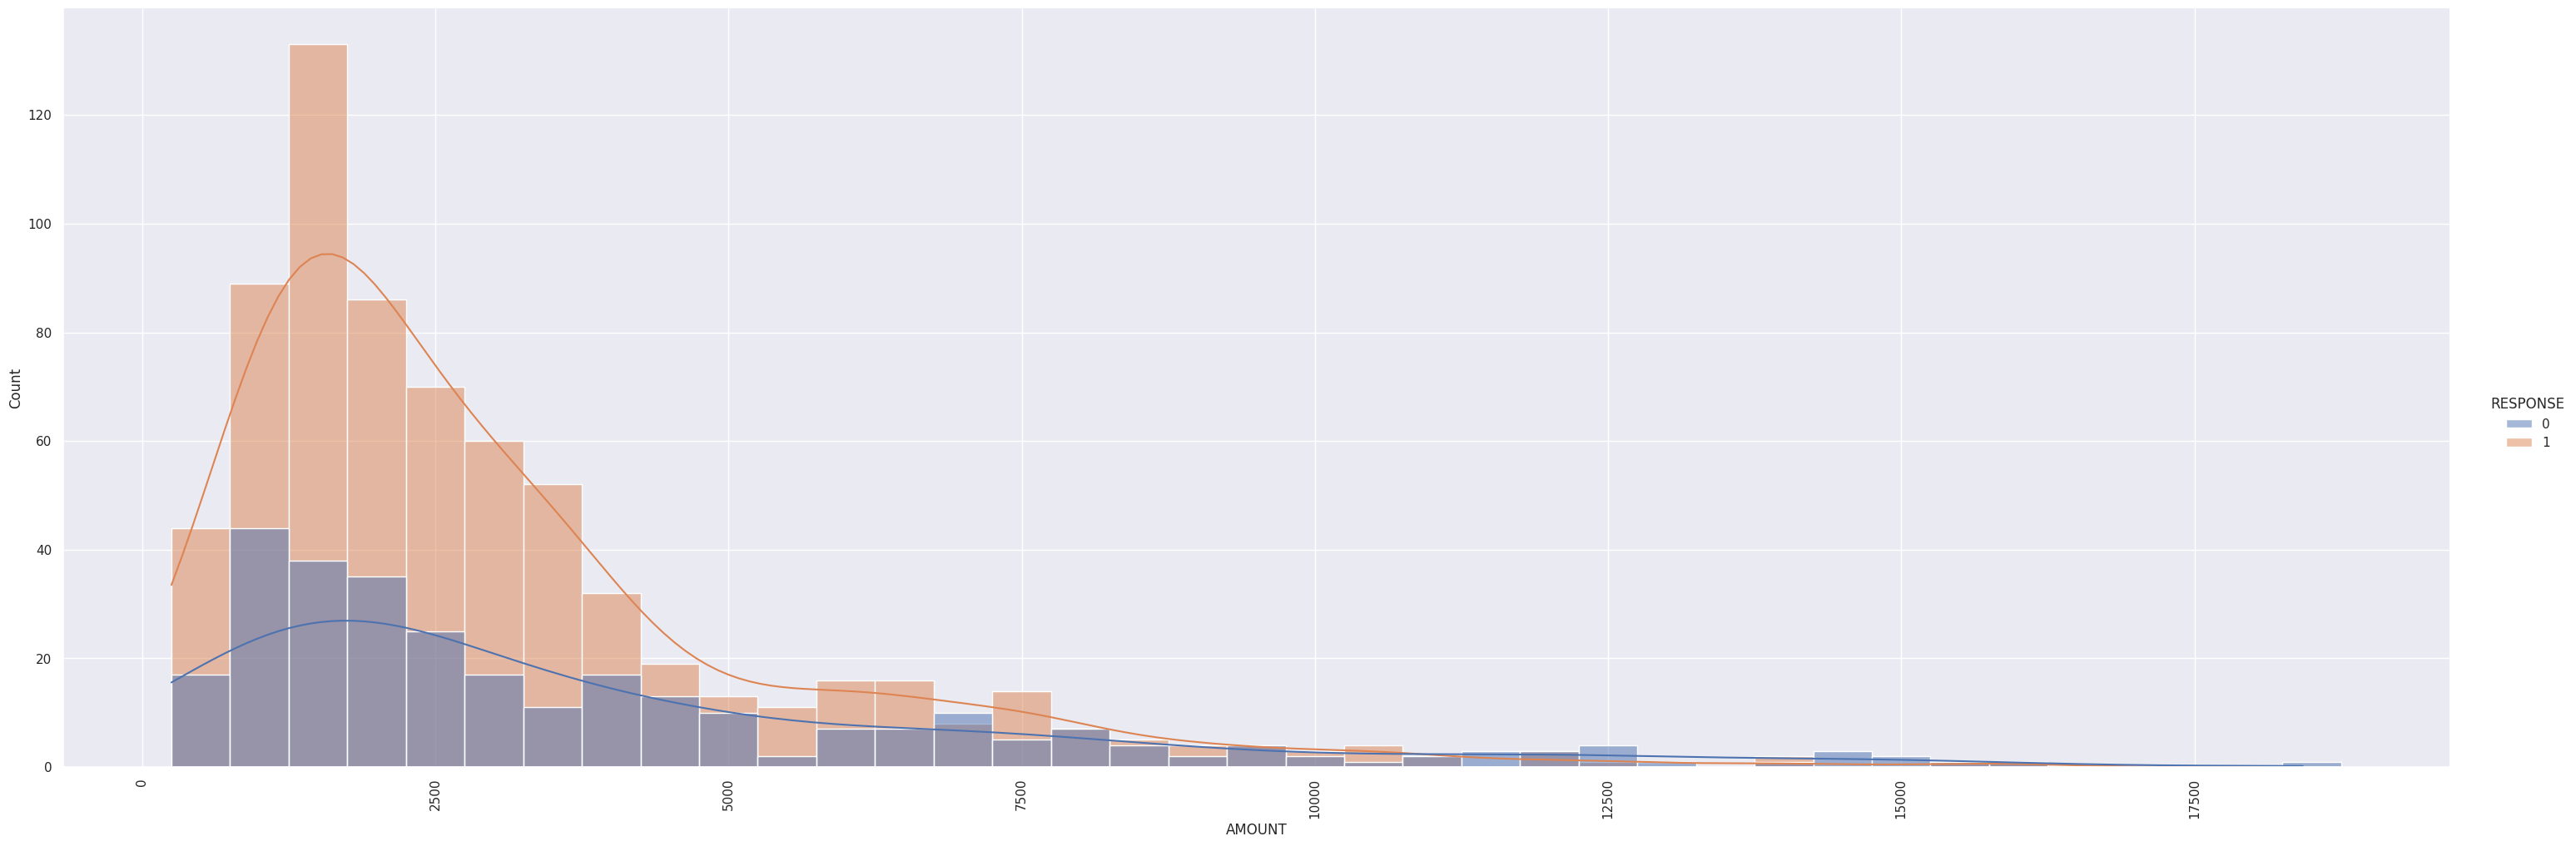

In [ ]:
#Relationshiop between amount and response
sns.displot(data = df, x='AMOUNT', binwidth=500, kde=True, hue='RESPONSE',height=10,aspect=30/10)
plt.xticks(rotation=90)
plt.show()

Applicants who borrow amounts of 1000 are likely to default. People with amounts of 1500 are most likely to get a good credit rating.

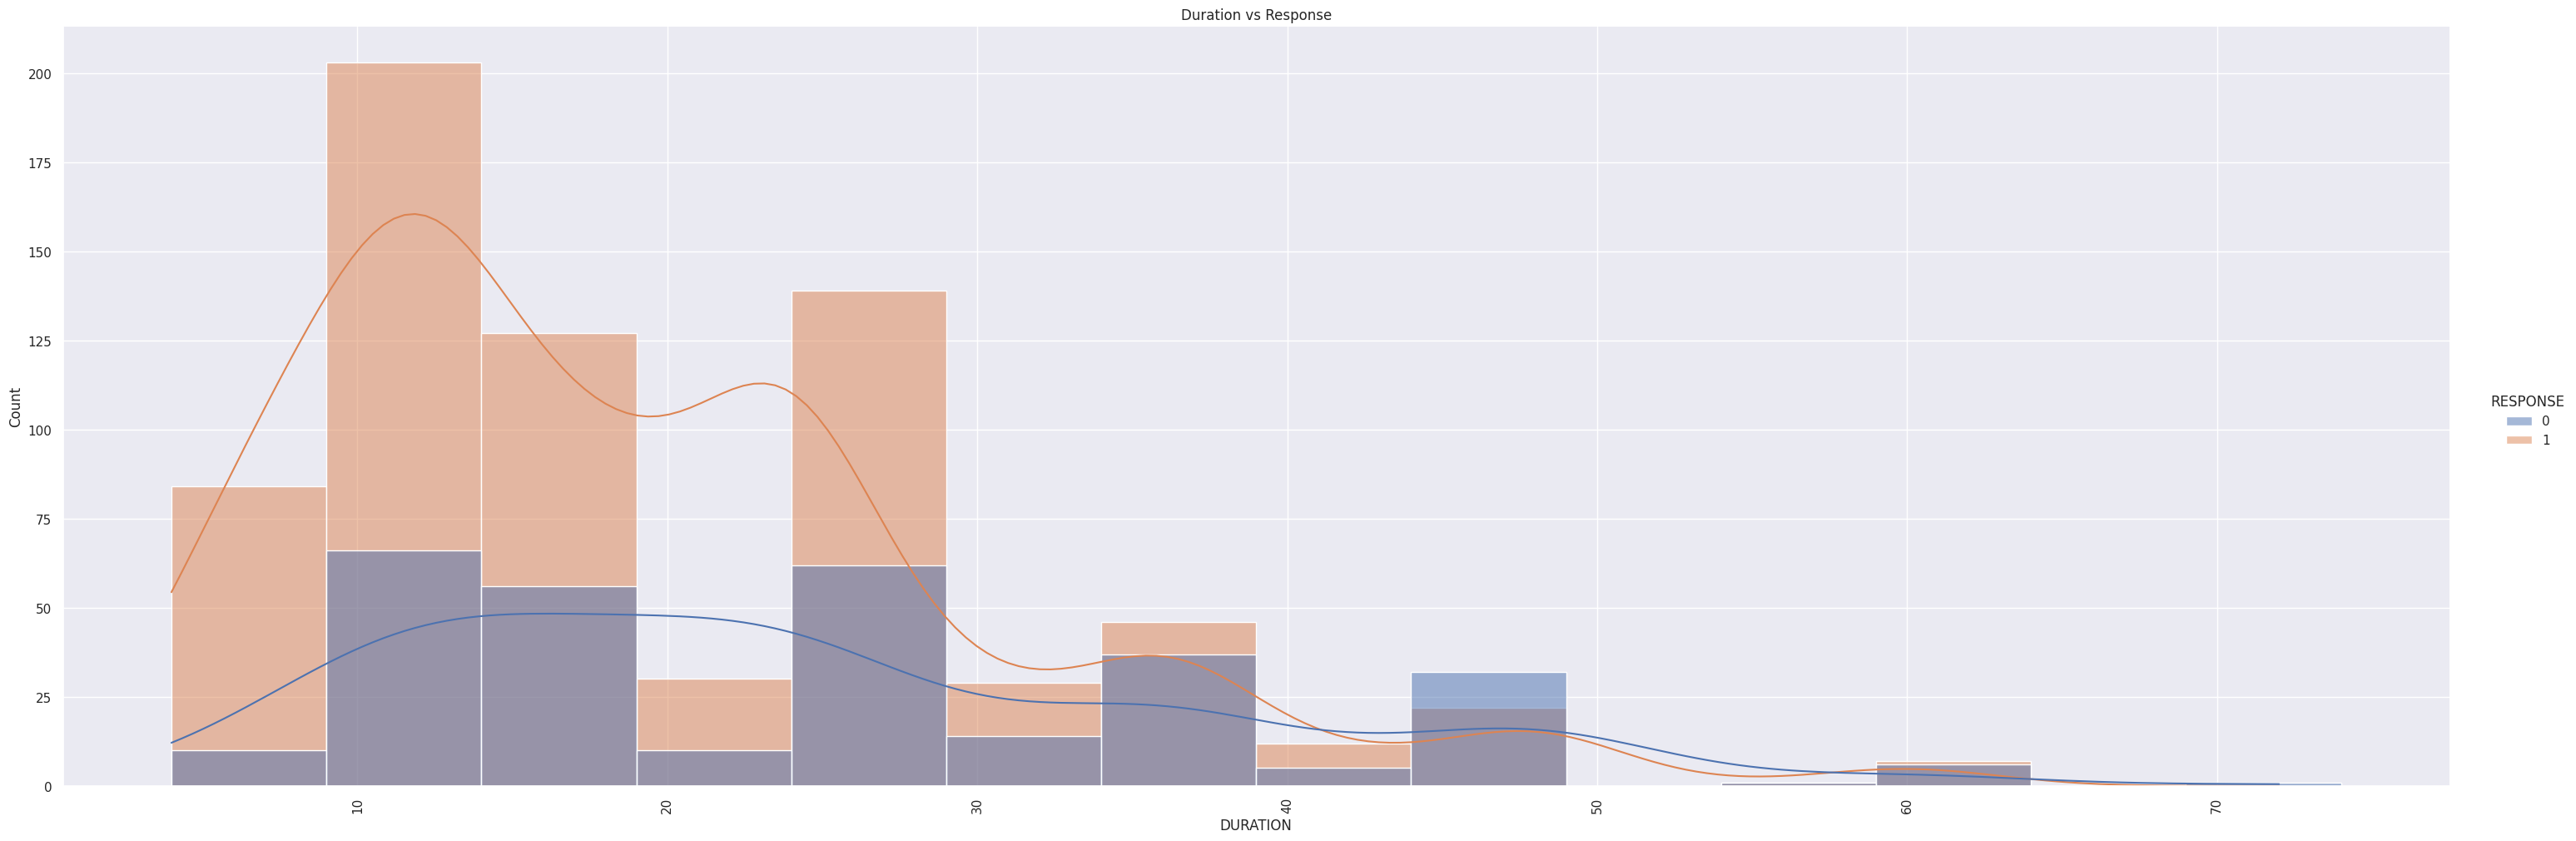

In [ ]:
#Relationshiop between duration and response
sns.displot(data = df, x='DURATION', binwidth=5, kde=True, hue='RESPONSE',height=10,aspect=30/10).set(title="Duration vs Response")
plt.xticks(rotation=90)
plt.show()

Applicants who have a credit duration of 10 to 15 months are likely to get a good credit rating.

<Figure size 3000x1000 with 0 Axes>

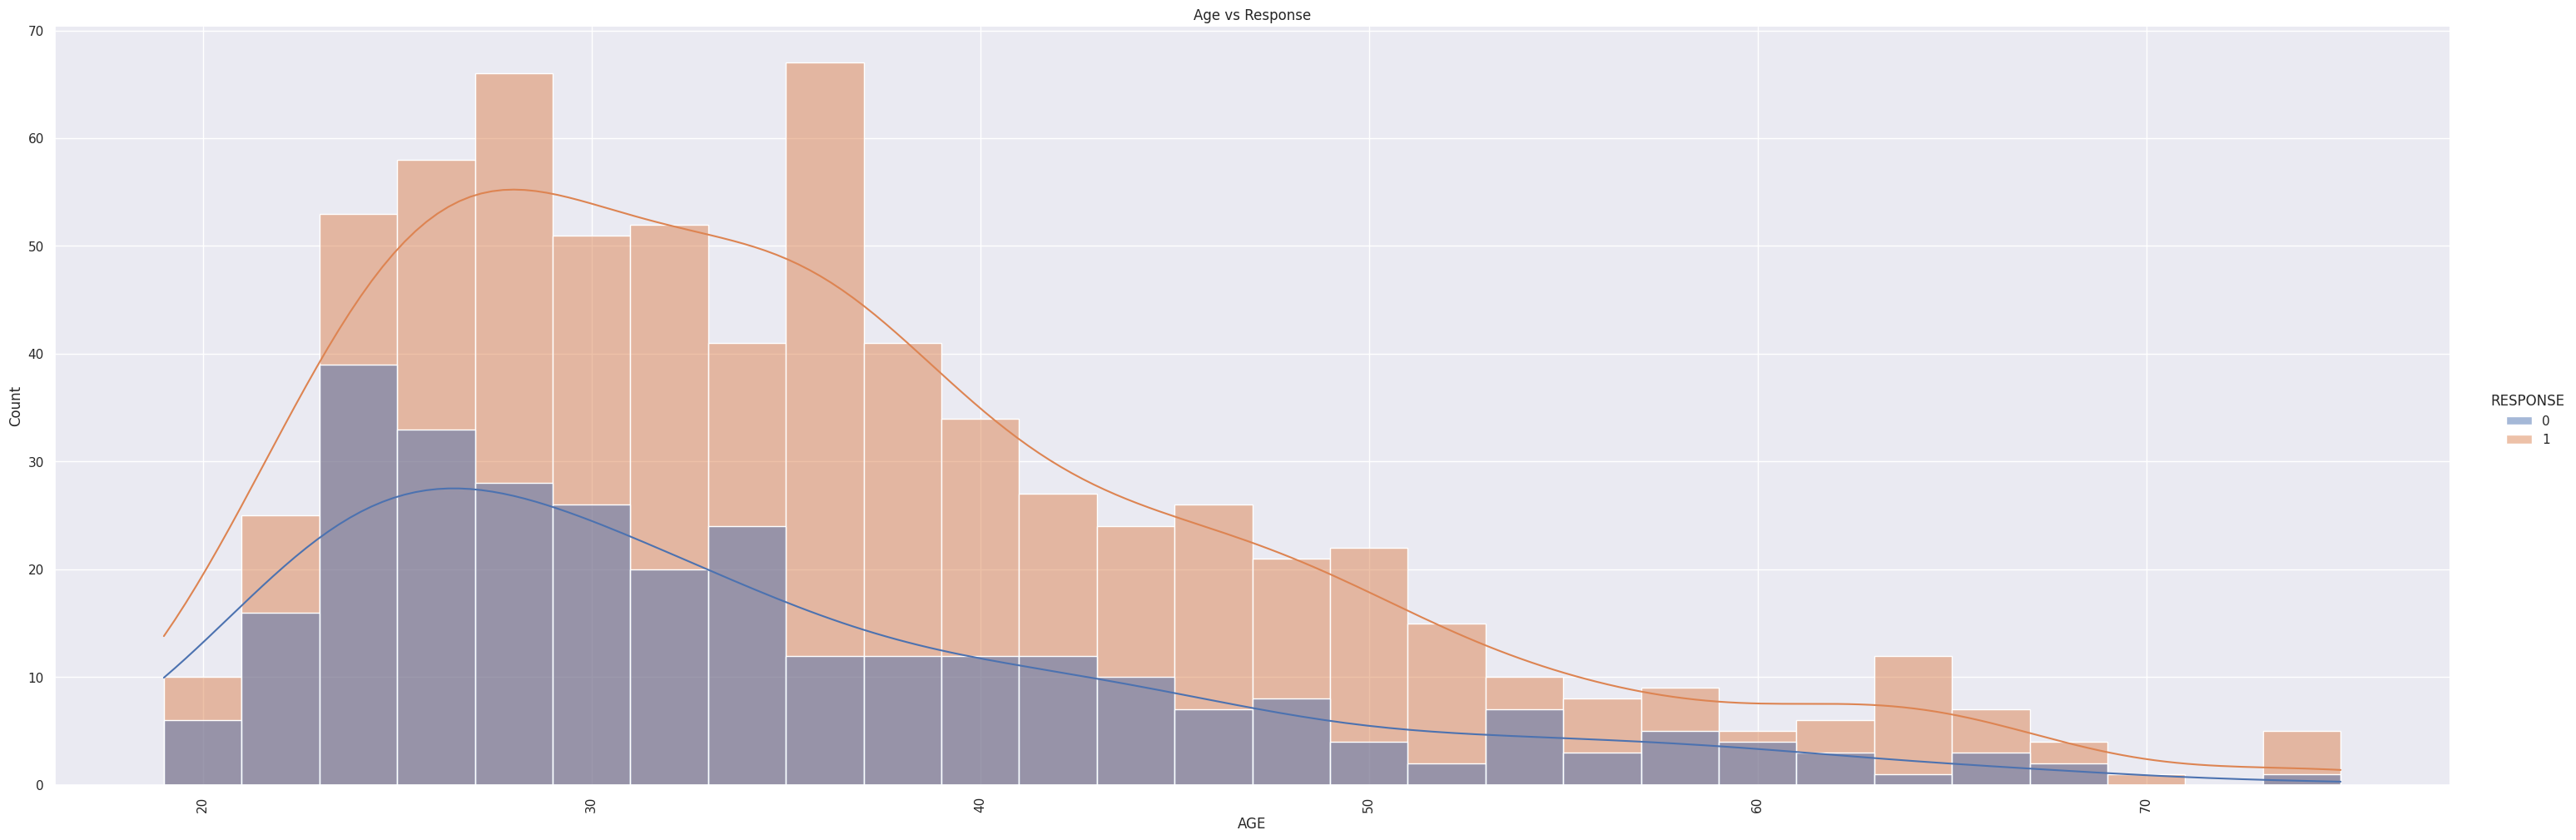

In [ ]:
#Relationshiop between age and response
plt.figure(figsize=(30,10))

sns.displot(data = df, x='AGE', binwidth=2, kde=True, hue='RESPONSE',height=10,aspect=30/10).set(title="Age vs Response")
plt.xticks(rotation=90)
plt.show()

Most of the defaulters are around the ages of 26 and below. Most of the people who have a good credit rating are within the ages of 35 to around 55.

For people older than 55 years perform more checks before giving them credit.

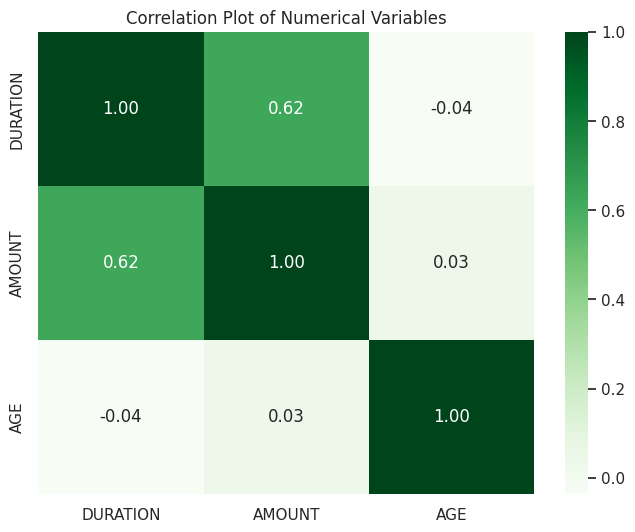

In [ ]:
#Checking the correlation between numerical variables


correlations = df[['DURATION', 'AMOUNT', 'AGE']].corr()
sns.heatmap(correlations,annot=True,cmap="Greens",fmt=".2f")
plt.title("Correlation Plot of Numerical Variables")
plt.show()

The numerical columns do not have a high correlation so all of them will be used in the modelling stage.

During the exploratory stage, the following three columns were validated as categorical hence they will be removed from the numerical colum.

The response column is our target variable hence will be removed from the list.

In [ ]:
addList = ['NUM_CREDITS', 'NUM_DEPENDENTS','INSTALL_RATE']
biColumns.remove('RESPONSE')

In [ ]:
#Combine the numerical and categorical lists
print(numColumns)

print(biColumns)
myList = biColumns + catColumns + addList
print(catColumns)
# print(catColumns.extend(['NUM_CREDITS', 'NUM_DEPENDENTS','INSTALL_RATE']))

['DURATION', 'AMOUNT', 'INSTALL_RATE', 'AGE', 'NUM_CREDITS', 'NUM_DEPENDENTS']
['NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'MALE_DIV', 'MALE_SINGLE', 'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'REAL_ESTATE', 'PROP_UNKN_NONE', 'OTHER_INSTALL', 'RENT', 'OWN_RES', 'TELEPHONE', 'FOREIGN']
['CHK_ACCT', 'HISTORY', 'SAV_ACCT', 'EMPLOYMENT', 'PRESENT_RESIDENT', 'JOB']


In [ ]:
#confirming the columns in the newly created list
myList

['NEW_CAR',
 'USED_CAR',
 'FURNITURE',
 'RADIO/TV',
 'EDUCATION',
 'RETRAINING',
 'MALE_DIV',
 'MALE_SINGLE',
 'MALE_MAR_or_WID',
 'CO-APPLICANT',
 'GUARANTOR',
 'REAL_ESTATE',
 'PROP_UNKN_NONE',
 'OTHER_INSTALL',
 'RENT',
 'OWN_RES',
 'TELEPHONE',
 'FOREIGN',
 'CHK_ACCT',
 'HISTORY',
 'SAV_ACCT',
 'EMPLOYMENT',
 'PRESENT_RESIDENT',
 'JOB',
 'NUM_CREDITS',
 'NUM_DEPENDENTS',
 'INSTALL_RATE']

In [ ]:
#Creating a list so as to perform a VIF in order to do feature selection
#all columns with a vif score of 5 and more will be dropped since they will give us a wrong representation of the data. This is to avoid multicollinearity.
X = df[myList]
vif_data = pd.DataFrame()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_data['feature'] = X.columns
vif_data['VIF'] = [vif(X.values,i) for i in range(len(X.columns))]
print(vif_data)

             feature        VIF
0            NEW_CAR   4.542282
1           USED_CAR   2.721387
2          FURNITURE   3.692958
3           RADIO/TV   5.354737
4          EDUCATION   1.807513
5         RETRAINING   2.524814
6           MALE_DIV   1.211215
7        MALE_SINGLE   3.406301
8    MALE_MAR_or_WID   1.339333
9       CO-APPLICANT   1.089378
10         GUARANTOR   1.145058
11       REAL_ESTATE   1.653350
12    PROP_UNKN_NONE   2.598998
13     OTHER_INSTALL   1.299048
14              RENT   3.934275
15           OWN_RES  13.315527
16         TELEPHONE   2.074761
17           FOREIGN   1.122766
18          CHK_ACCT   2.978447
19           HISTORY   8.992723
20          SAV_ACCT   1.642115
21        EMPLOYMENT   5.888129
22  PRESENT_RESIDENT   8.450979
23               JOB  11.184798
24       NUM_CREDITS   8.965865
25    NUM_DEPENDENTS  11.047170
26      INSTALL_RATE   8.294343


In [ ]:
# Dropping highly coliner columns that is with 5 and above'
r = ['RADIO/TV','OWN_RES','HISTORY','EMPLOYMENT','PRESENT_RESIDENT','JOB','NUM_CREDITS','NUM_DEPENDENTS','INSTALL_RATE']

newX = [i for i in X if i not in r]


In [ ]:
newDf = df[newX]


In [ ]:
#confirming that the remaining columns have a vif score of 4 and below
vif_data = pd.DataFrame()
vif_data['feature'] = newDf.columns
vif_data['VIF'] = [vif(newDf.values,i) for i in range(len(newDf.columns))]
print(vif_data)

            feature       VIF
0           NEW_CAR  1.515477
1          USED_CAR  1.351926
2         FURNITURE  1.358608
3         EDUCATION  1.144211
4        RETRAINING  1.286033
5          MALE_DIV  1.135678
6       MALE_SINGLE  2.420606
7   MALE_MAR_or_WID  1.209456
8      CO-APPLICANT  1.069194
9         GUARANTOR  1.114749
10      REAL_ESTATE  1.497852
11   PROP_UNKN_NONE  1.359600
12    OTHER_INSTALL  1.235403
13             RENT  1.261430
14        TELEPHONE  1.740390
15          FOREIGN  1.107138
16         CHK_ACCT  2.325572
17         SAV_ACCT  1.582680


## **5. Data Preprocessing**

In [ ]:
#combining the numerical and categorical columns for modelling

modelling = newX+numColumns
modelling

['NEW_CAR',
 'USED_CAR',
 'FURNITURE',
 'EDUCATION',
 'RETRAINING',
 'MALE_DIV',
 'MALE_SINGLE',
 'MALE_MAR_or_WID',
 'CO-APPLICANT',
 'GUARANTOR',
 'REAL_ESTATE',
 'PROP_UNKN_NONE',
 'OTHER_INSTALL',
 'RENT',
 'TELEPHONE',
 'FOREIGN',
 'CHK_ACCT',
 'SAV_ACCT',
 'DURATION',
 'AMOUNT',
 'INSTALL_RATE',
 'AGE',
 'NUM_CREDITS',
 'NUM_DEPENDENTS']

In [ ]:
#Creating the modelling data frame after feature selection

modelDf = df[modelling]
modelDf

,NEW_CAR,USED_CAR,FURNITURE,EDUCATION,RETRAINING,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,...,TELEPHONE,FOREIGN,CHK_ACCT,SAV_ACCT,DURATION,AMOUNT,INSTALL_RATE,AGE,NUM_CREDITS,NUM_DEPENDENTS
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,4,6,1169,4,67,2,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,48,5951,2,22,1,1
2,0,0,0,1,0,0,1,0,0,0,...,0,0,3,0,12,2096,2,49,1,2
3,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,42,7882,2,45,1,2
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,24,4870,3,53,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,0,0,0,0,0,...,0,0,3,0,12,1736,3,31,1,1
996,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,30,3857,4,40,1,1
997,0,0,0,0,0,0,1,0,0,0,...,0,0,3,0,12,804,4,38,1,1
998,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,45,1845,4,23,1,1


In [ ]:
#Make a copy of the data we have cleaned and validated. Incase of any issues one can always revert to this copy

df_feature = modelDf.copy()

In [ ]:
#dataset for modelling
df_feature.head()

,NEW_CAR,USED_CAR,FURNITURE,EDUCATION,RETRAINING,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,...,TELEPHONE,FOREIGN,CHK_ACCT,SAV_ACCT,DURATION,AMOUNT,INSTALL_RATE,AGE,NUM_CREDITS,NUM_DEPENDENTS
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,4,6,1169,4,67,2,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,48,5951,2,22,1,1
2,0,0,0,1,0,0,1,0,0,0,...,0,0,3,0,12,2096,2,49,1,2
3,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,42,7882,2,45,1,2
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,24,4870,3,53,2,2


In [ ]:
#Scaling the numerical features

#Instantiate StandardScaler
transformer = StandardScaler()

for i in df_feature.columns:
  df_feature[i] = transformer.fit_transform(df_feature[i].values.reshape(-1,1))

df_feature.head()

,NEW_CAR,USED_CAR,FURNITURE,EDUCATION,RETRAINING,MALE_DIV,MALE_SINGLE,MALE_MAR_or_WID,CO-APPLICANT,GUARANTOR,...,TELEPHONE,FOREIGN,CHK_ACCT,SAV_ACCT,DURATION,AMOUNT,INSTALL_RATE,AGE,NUM_CREDITS,NUM_DEPENDENTS
0,-0.552705,-0.338862,-0.470108,-0.229416,-0.327749,-0.229416,0.908195,-0.318311,-0.206768,-0.234206,...,1.214598,-0.196014,-1.254566,1.833169,-1.236478,-0.745131,0.918477,2.766456,1.027079,-0.428290
1,-0.552705,-0.338862,-0.470108,-0.229416,-0.327749,-0.229416,-1.101086,-0.318311,-0.206768,-0.234206,...,-0.823318,-0.196014,-0.459026,-0.699707,2.248194,0.949817,-0.870183,-1.191404,-0.704926,-0.428290
2,-0.552705,-0.338862,-0.470108,4.358899,-0.327749,-0.229416,0.908195,-0.318311,-0.206768,-0.234206,...,-0.823318,-0.196014,1.132053,-0.699707,-0.738668,-0.416562,-0.870183,1.183312,-0.704926,2.334869
3,-0.552705,-0.338862,2.127172,-0.229416,-0.327749,-0.229416,0.908195,-0.318311,-0.206768,4.269750,...,-0.823318,-0.196014,-1.254566,-0.699707,1.750384,1.634247,-0.870183,0.831502,-0.704926,2.334869
4,1.809283,-0.338862,-0.470108,-0.229416,-0.327749,-0.229416,0.908195,-0.318311,-0.206768,-0.234206,...,-0.823318,-0.196014,-1.254566,-0.699707,0.256953,0.566664,0.024147,1.535122,1.027079,2.334869


In [ ]:
# Creating data for modelling
X = df_feature.copy().values
y = df['RESPONSE'].values

In [ ]:
#Split into train and test set
X_train, X_test , y_train, y_test = model_selection.train_test_split(X,y,test_size=0.3,random_state=1)

## **6. Supervised Learning**


In this section, various models will be built and evaluation metric will be implemented to gauge the predictions made.

A baseline model will be the first model implemented and then other models will be built to see if they make better predictions as compared to the baseline model.

For this project, the recall score will be detrimental since the aim is to correctly classify if a customer will default or not and eliminating false negatives will be better. A customer defaulting and it being overlooked will not help the business.

At minimum three models must be built:

Simple baseline model, in this case logistic regression
A complex model....random forest and XGBoost


### a) Logistic Regression - Baseline

In [ ]:
from statsmodels.regression.linear_model import lrange
LR = LogisticRegression()

LR.fit(X_train,y_train)

y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)


In [ ]:
print(metrics.confusion_matrix(y_test,y_pred_test))

[[ 37  49]
 [ 25 189]]


In [ ]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50        86
           1       0.79      0.88      0.84       214

    accuracy                           0.75       300
   macro avg       0.70      0.66      0.67       300
weighted avg       0.74      0.75      0.74       300



**NOTE**
1. Precision: Percentage of correct positive predictions relative to total positive predictions.

2. Recall: Percentage of correct positive predictions relative to total actual positives.

From the above report, the following can be made

A precision score of 79%, which means that out of all the customers that the model predicted would have a good credit rating only 79% of them actually did.

A recall of 88% means that out of all the customers that actually had a good credit rating, the model only predicted this outcome correctly for 80%.

The model has an accuracy of 75% which is a really good score.

The model has an F1 score of 84% which means the model will be accurate more than half the time it makes a prediction and this is really good.

The model overall performs very well for the majority class which is the customers who had a good credit rating.

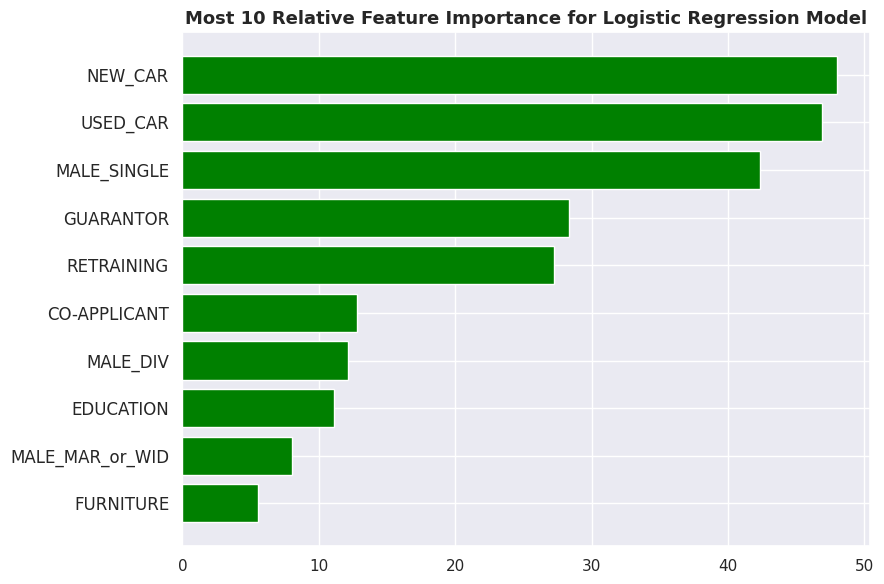

In [ ]:

# Feature Importances
feature_importance = abs(LR.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(9, 6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color='green')
plt.title('Most 10 Relative Feature Importance for Logistic Regression Model', fontsize=13, fontweight='bold')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(modelling)[sorted_idx], fontsize=12)

plt.tight_layout()
plt.show()

The top three most important features for the logistic regression model are:

1. New car, most of the applicants who have good credit rating are the ones who take loans for new cars most likely to avoid repossession
2. Used car most of the applicants who have good credit rating are the ones who take loans for used cars most likely to avoid repossession
3. Male and single applicants also have a good credit rating most likely since they do not have dependents and they can pay their loans without much hustle.


### b) Random Forest

In [ ]:
#Fitting RF classifier to the training set

rand_forest = ensemble.RandomForestClassifier()

#train it on the training set
rand_forest.fit(X_train, y_train)

#predict based on the model we have trained
y_pred_rand = rand_forest.predict(X_test)

In [ ]:
#Getting the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_rand))

[[ 33  53]
 [ 21 193]]


In [ ]:
#Getting the classification report

print(metrics.classification_report(y_test, y_pred_rand))

              precision    recall  f1-score   support

           0       0.61      0.38      0.47        86
           1       0.78      0.90      0.84       214

    accuracy                           0.75       300
   macro avg       0.70      0.64      0.66       300
weighted avg       0.73      0.75      0.73       300



From the above report, the following can be made

A precision score of 78%, which means that out of all the customers that the model predicted would have a good credit rating only 78% of them actually did. This is the same score as for the baseline model.

A recall of 90% means that out of all the customers that actually had a good credit rating, the model only predicted this outcome correctly for 90%.

The model has an accuracy of 75% which is a really good score.

The model has an F1 score of 84% which means the model will be accurate more than half the time it makes a prediction and this is really good.

The model overall performs very well for the majority class which is the customers who had a good credit rating.

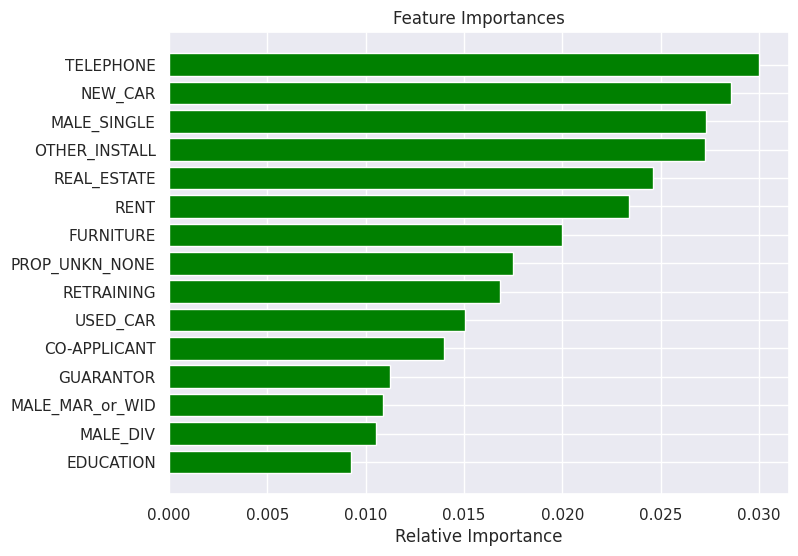

In [ ]:
#feature importance
feature_names = list(modelling)
importances = rand_forest.feature_importances_[0:15]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

For the random forest classifier model, the top most important features are:

1. Telephone that means that the bank can reach out to the customer to remind them to repay their loans in time.
2. Other Installments, those that have other installments have good credit rating because they will be obliged to pay as to avoid being black listed with the other credit companies they have taken their loans from.
3. Male and single applicants have a good credit rating because most likely they do not have other responsibilities to take care of.

### c) Gradient Boost

In [ ]:
#Fitting Gradient Boosting classifier to the training set

GB = ensemble.GradientBoostingClassifier(random_state=0, learning_rate=0.1)
GB.fit(X_train,y_train)

#Getting the predicted values
y_pred_GBM = GB.predict(X_test)

In [ ]:
#Getting the confusion matrix
print("Confusion matrix Gradient Boost:" '\n', metrics.confusion_matrix(y_test, y_pred_GBM))

Confusion matrix Gradient Boost:
 [[ 41  45]
 [ 21 193]]


In [ ]:
#Getting the classification report

print("Confusion matrix Gradient Boost:" '\n', metrics.classification_report(y_test, y_pred_GBM))

Confusion matrix Gradient Boost:
               precision    recall  f1-score   support

           0       0.66      0.48      0.55        86
           1       0.81      0.90      0.85       214

    accuracy                           0.78       300
   macro avg       0.74      0.69      0.70       300
weighted avg       0.77      0.78      0.77       300



From the above report, the following can be made

A precision score of 81%, which is the highest score of all the models that we have done.

A recall of 90% means that out of all the customers that actually had a good credit rating, the model only predicted this outcome correctly for 90%.

The model has an accuracy of 78% which is a really good score. It is an improvement of 2% from the baseline model.

The model has an F1 score of 85% which means the model will be accurate more than half the time it makes a prediction and this is really good. It is the same as the random forest model.

The model overall performs very well for the majority class which is the customers who had a good credit rating.

In [ ]:
#Getting the important features
Important_features = GB.feature_importances_

<Axes: title={'center': 'Feature Importance'}, xlabel='Feature_importance', ylabel='Features'>

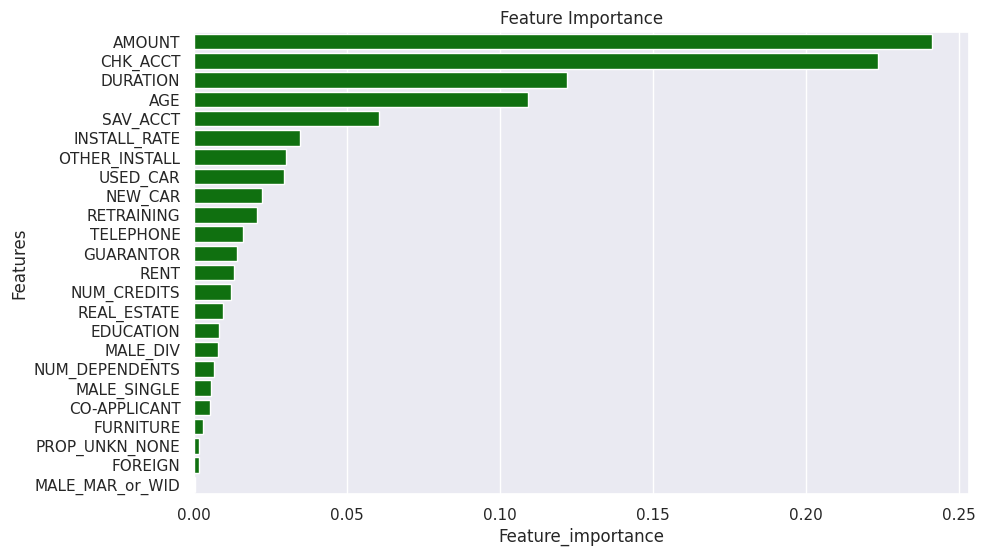

In [ ]:
#Creating a dataframe of feature names and feature importances

FIM = pd.DataFrame({'Features': modelling, 'Feature_importance': Important_features})
FIM = FIM.sort_values(by=['Feature_importance'], ascending=False)

#Plotting the top ten feature importance

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM, color='green')

For the gradient boost model, the top most important features are:

1. Amount
2. Check Account
3. Duration

<ipython-input-124-4e1aa60add4d>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
<ipython-input-124-4e1aa60add4d>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
<ipython-input-124-4e1aa60add4d>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


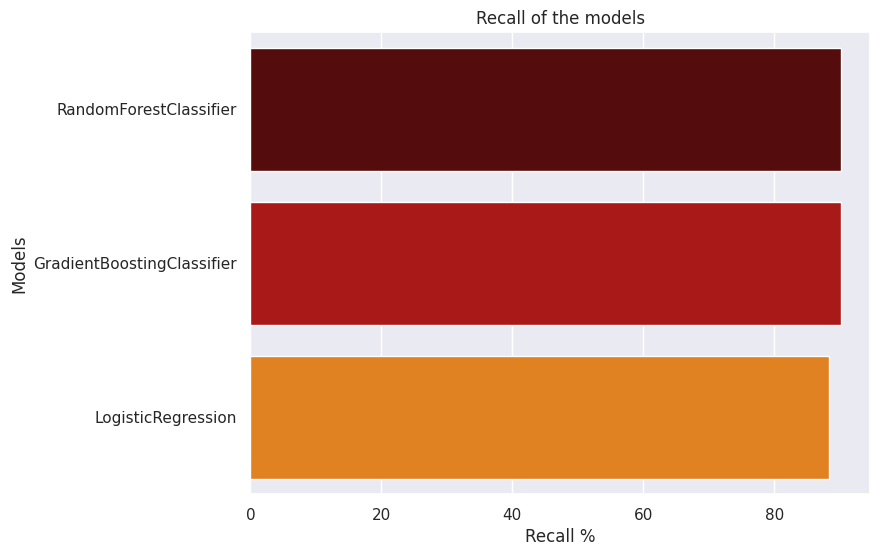

In [ ]:
#Comparing the models recall score

models = [LR,rand_forest, GB]

result = []
results = pd.DataFrame(columns= ["Models","Recall"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    recall = metrics.recall_score(y_test, y_pred)
    result = pd.DataFrame([[names, recall*100]], columns= ["Models","Recall"])
    results = results.append(result)
    results = results.sort_values(by=['Recall'], ascending=False)


sns.barplot(x= 'Recall', y = 'Models', data=results, palette="gist_heat")
plt.xlabel('Recall %')
plt.title('Recall of the models');

Random Forest Classifier has the best recall score of all the models followed by the gradient boost which is behind by only 1%

<ipython-input-125-ab17f1c34050>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
<ipython-input-125-ab17f1c34050>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)
<ipython-input-125-ab17f1c34050>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(result)


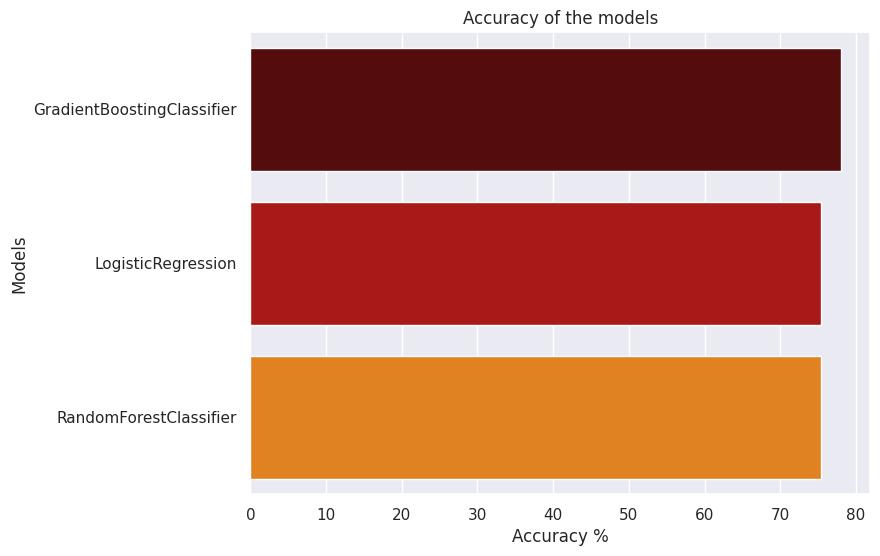

In [ ]:
#Comparing the models accuracy score

models = [LR,rand_forest, GB]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    recall = metrics.accuracy_score(y_test, y_pred)
    result = pd.DataFrame([[names, recall*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    results = results.sort_values(by=['Accuracy'], ascending=False)


sns.barplot(x= 'Accuracy', y = 'Models', data=results, palette="gist_heat")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models');

Gradient Boost has the best accuracy score of all the models.

### **d) Model Evaluation**

The Gradient Boost model will be the best model suited for correctly classifying whether a person will default or not since it has the highest accuracy and recall score.

## **7. Conclusion**
The initial goal of achieving 75% accuracy is achieved by all the models that were fitted.

Gradient Boost Classifier model provides the highest accuracy score of all the models of 78% and has an overall high recall score of 90%

All the features play an important role in determining the credit rating

## **8. Recommendation**

1. The company should focus on skilled employees or officials

2. The company should perform more checks before giving credit to people with no credit history and avoid giving people with existing credit more credit at the same bank.

3. Market more to people who have been employed for more than two years since they have a lower default rate.

4. Market more to people with savings account as they have a lower default rate.

5. The lower the amount, the higher the default rate

6. The shorter the duration of credit in months that is ten months or less, the higher the likelihood of getting a good credit rating.
Avoid giving credit to people who pay back after a long duration of 24 months or more.

7. Younger customers have a high default rate as compared to their older counterparts. Market credit to people between the ages of 35 to 55 years as they have good credit rating.
Perform mre checks before giving credit to people above 55 years.

## **9. Follow up Questions**

1. Confirm what the DM currency is for in check account column

2. Split gender and relationship status to be two seperate categories

3. There is no representation of the female gender in the list of applicants

4. More data to get more accurate models.